In [8]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------- ------------------------ 61.4/165.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB 8.0 MB/s eta 0:00:01
   --- ------------------------------------ 0.6/8.0 MB 9.8 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/8.0 MB 7.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.0 MB 8.3 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 8.0 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.0 MB 7.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 7.2 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.0 MB 7.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.0 MB 7.8 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 667.8 kB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.1/10.9 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.5/10.9 MB 5.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/10.9 MB 6.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.9 MB 6.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.9 MB 7.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.9 MB 6.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.9 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/10.9 MB 7.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.9 MB 7.4 MB/s eta 0:00:02
   ---------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
x=df[["Pclass","Sex","Age"]]
y=df.Survived

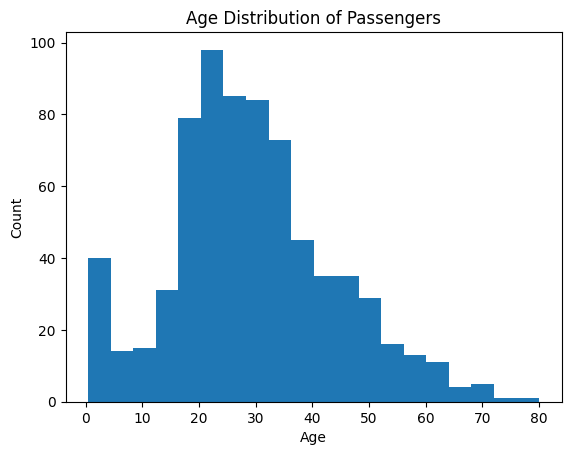

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()

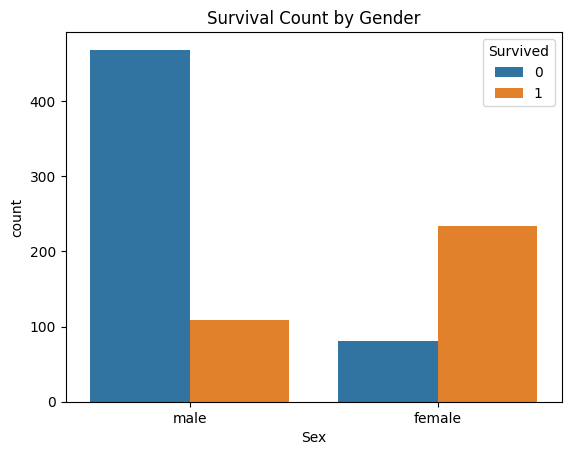

In [12]:
import seaborn as sns
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

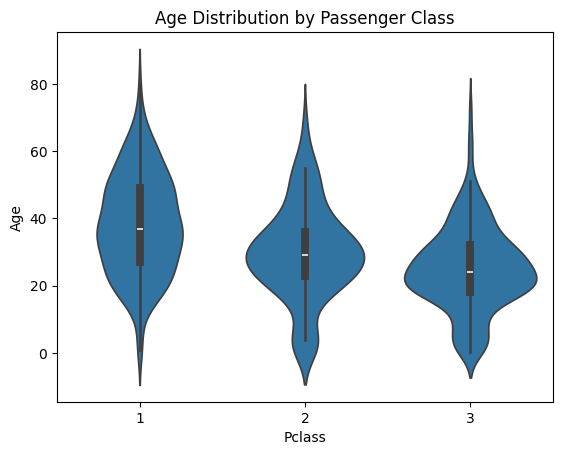

In [13]:
sns.violinplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

In [14]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
x.Age.fillna(x.Age.mean(),inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gen=le.fit_transform(x.Sex)

In [25]:
x["Gender"]=gen
x.drop("Sex",axis=1,inplace=True)

In [26]:
x.isnull().sum()

Pclass    0
Age       0
Gender    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [29]:
len(train_x)

712

In [30]:
len(test_x)

179

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [33]:
model.fit(train_x,train_y)

LogisticRegression()

In [34]:
model.score(test_x,test_y)


0.7988826815642458

In [35]:
x.head()

,Pclass,Age,Gender
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [36]:
a=int(input("Enter Pclass: "))
b=int(input("Enter Age: "))
c=int(input("Enter Gender (1-Male, 0-Female): "))

if model.predict([[a,b,c]])[0]==0:
    print("Not Survived")
else:
    print("Survived")

Enter Pclass:  23
Enter Age:  12
Enter Gender (1-Male, 0-Female):  0


Not Survived


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
for i in range(1,50):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_x,train_y)
  model.predict(test_x)==test_y
  print("k for ",i," is: ",model.score(test_x,test_y))

k for  1  is:  0.7597765363128491
k for  2  is:  0.776536312849162
k for  3  is:  0.7932960893854749
k for  4  is:  0.776536312849162
k for  5  is:  0.7597765363128491
k for  6  is:  0.7374301675977654
k for  7  is:  0.7653631284916201
k for  8  is:  0.7262569832402235
k for  9  is:  0.7486033519553073
k for  10  is:  0.7486033519553073
k for  11  is:  0.7821229050279329
k for  12  is:  0.7821229050279329
k for  13  is:  0.7877094972067039
k for  14  is:  0.776536312849162
k for  15  is:  0.7877094972067039
k for  16  is:  0.7653631284916201
k for  17  is:  0.7821229050279329
k for  18  is:  0.7597765363128491
k for  19  is:  0.7821229050279329
k for  20  is:  0.7597765363128491
k for  21  is:  0.776536312849162
k for  22  is:  0.7541899441340782
k for  23  is:  0.7597765363128491
k for  24  is:  0.7541899441340782
k for  25  is:  0.7486033519553073
k for  26  is:  0.7541899441340782
k for  27  is:  0.770949720670391
k for  28  is:  0.7597765363128491
k for  29  is:  0.770949720670391


In [39]:
import pickle

In [43]:
pickle.dump(model,open("titanic.pkl","wb"))